# **주요 내용**

*   실험

In [1]:
notebookName = "20200516"
notebookName

'20200516'

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3076178615850709671, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6906491821715138921
 physical_device_desc: "device: XLA_CPU device"]

In [4]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [5]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**파일 압축 해제 (드라이브에는 *.zip 파일 형식으로 저장되어 있음)**

In [7]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path):
    os.mkdir(pcm_path)

if not os.path.exists(wav_path):
    os.mkdir(wav_path)

# unzip with quite mode (-q options)
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSM03224CHD0', 'GSF09431SHY0', 'I4F04732OIY0', 'GSF03031LJH0', 'GSF09025WYY0']
50


***.pcm to *.wav**

In [8]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))): # sorted!!!
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)): # sorted!!!
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3 ** 8   # 19,683

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80

select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

# naming
save_train_data_name = 'train_data'
save_train_labels_name = 'train_labels'

save_test_data_name = 'test_data'
save_test_labels_name = 'test_labels'

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [10]:
# save features as *.npz format

from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[select_train_data * num_labels]
train_labels = labels[select_train_data * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./" + save_train_data_name, train_data)
np.save("./" + save_train_labels_name, train_labels)

np.save("./" + save_test_data_name, test_data)
np.save("./" + save_test_labels_name, test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (4000, 6561), train_labels.shape: (4000,)
test_data.shape: (1000, 6561), test_labels.shape: (1000,)


In [50]:
from tensorflow.keras.utils import to_categorical

# test_data
test_data = np.load(save_test_data_name + ".npy")
test_labels = np.load(save_test_labels_name + ".npy")

test_data = test_data.reshape(len(test_data), data_length, 1)
test_labels = to_categorical(test_labels)

# standarization
test_data -= mean
test_data /= std 

NameError: ignored

**히스토리 불러오기**

In [87]:
model_list = np.array([
          ["model_{}".format(i) for i in range(3, 63, 3)],
          ["model_{}".format(i) for i in range(4, 63, 3)],
          ["model_{}".format(i) for i in range(5, 63, 3)]
])
print(model_list.shape)

(3, 20)


In [0]:
previous = "20200515_4"

In [0]:
histories = np.zeros((20, 3, 4, 200))

for i, models in enumerate(model_list):
    for j, model in enumerate(models):
        history = np.load(os.path.join("/content/drive/My Drive/results", "{}_{}.npz".format(previous, model)))

        histories[j, i, 0] = history['accuracy']
        histories[j, i, 1] = history['val_accuracy']
        histories[j, i, 2] = history['loss']
        histories[j, i, 3] = history['val_loss']

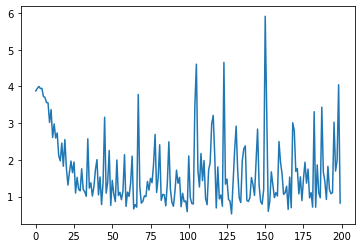

In [90]:
import matplotlib.pyplot as plt
plt.plot(histories[0, 0, 3])

In [91]:
b = histories.mean(axis = 0)
b.shape

(3, 4, 200)

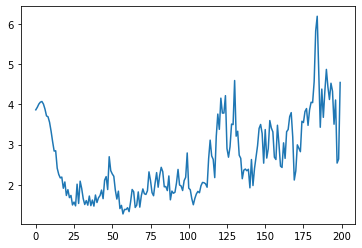

In [94]:
plt.plot(b[0, 3])

**지수이동평균 계산 및 결과 출력**

In [0]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [0]:
import matplotlib.pyplot as plt

def plot_histories(result):
    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)
    c = ['r', 'g', 'b', 'c', 'k', 'm']
    n = ['model_{}'.format(i) for i in range(1, 7, 1)]

    plt.subplot(1, 2, 1)
    for i, history in enumerate(result):
        acc = history[0]
        val_acc = history[1]
        plt.plot(np.arange(1, len(val_acc) + 1, 1), np.array(smooth_curve(val_acc)), color = c[i], label = n[i], alpha = .7)
    plt.title('Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    # plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    for i, history in enumerate(result):
        loss = history[2]
        val_loss = history[3]
        plt.plot(np.arange(1, len(val_loss) + 1, 1), smooth_curve(val_loss), color = c[i], label = n[i], alpha = .7)
    plt.title('Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend(loc = 'upper right')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

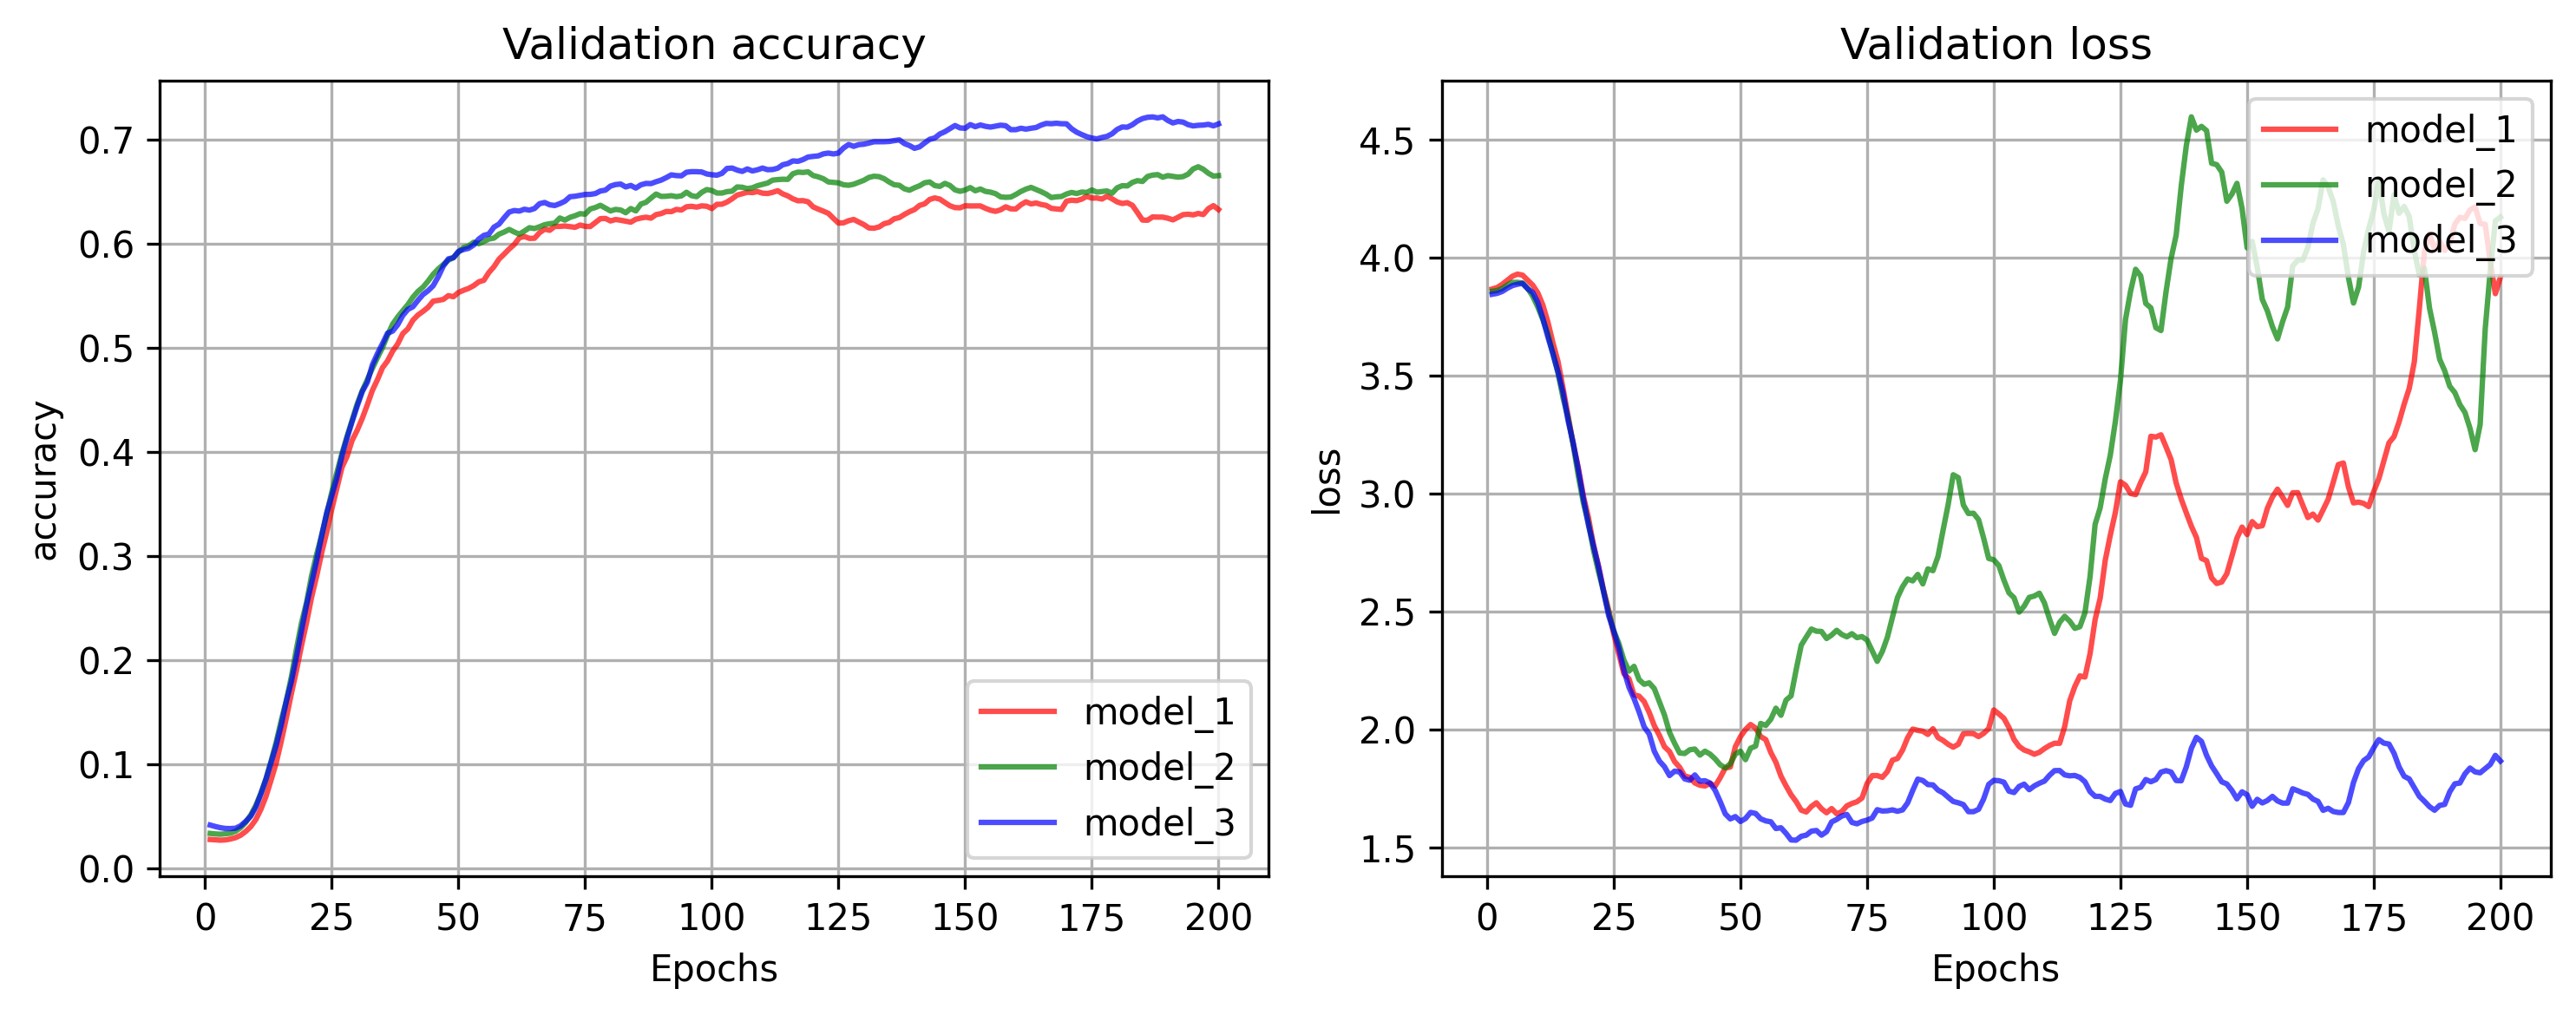

In [106]:
plot_histories(b)

In [48]:
from tensorflow.keras.models import load_model

preds = np.zeros((20, 3, 2))

for i, models in enumerate(model_list):
    for j, model in enumerate(models):
        m = load_model(os.path.join("/content/drive/My Drive/models", "{}_{}.h5".format(previous, model)))

        m.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
        
        preds[j, i, 0], preds[j, i, 1] = m.evaluate(test_data, test_labels, batch_size = 128)

ValueError: ignored

In [0]:
a = "8/8 [==============================] - 0s 24ms/step - loss: 0.6399 - accuracy: 0.8190"

In [53]:
a[-10:]

'cy: 0.8190'

In [0]:
a = [
     "8/8 [==============================] - 0s 24ms/step - loss: 0.6399 - accuracy: 0.8190",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.7375 - accuracy: 0.8160",
     "8/8 [==============================] - 0s 19ms/step - loss: 0.7369 - accuracy: 0.8180",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.0453 - accuracy: 0.7570",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.7204 - accuracy: 0.8100",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.8973 - accuracy: 0.7950",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.6620 - accuracy: 0.7470",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.8836 - accuracy: 0.7900",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.1008 - accuracy: 0.7710",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.5098 - accuracy: 0.6350",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.6249 - accuracy: 0.7250",
     "8/8 [==============================] - 0s 19ms/step - loss: 4.9135 - accuracy: 0.5950",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.9985 - accuracy: 0.7220",
     "8/8 [==============================] - 0s 19ms/step - loss: 0.7758 - accuracy: 0.8270",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.5264 - accuracy: 0.7230",
     "8/8 [==============================] - 0s 18ms/step - loss: 3.8325 - accuracy: 0.6130",
     "8/8 [==============================] - 0s 18ms/step - loss: 3.2250 - accuracy: 0.6270",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.8210 - accuracy: 0.6640",
     "8/8 [==============================] - 0s 18ms/step - loss: 12.5739 - accuracy: 0.4390",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.0602 - accuracy: 0.7000",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.7165 - accuracy: 0.8030",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.3546 - accuracy: 0.6210",
     "8/8 [==============================] - 0s 18ms/step - loss: 42.0661 - accuracy: 0.1920",
     "8/8 [==============================] - 0s 19ms/step - loss: 0.7246 - accuracy: 0.8200",
     "8/8 [==============================] - 0s 18ms/step - loss: 12.0688 - accuracy: 0.3590",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.1214 - accuracy: 0.7250",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.7336 - accuracy: 0.8260",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.8249 - accuracy: 0.8100",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.6242 - accuracy: 0.8390",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.9097 - accuracy: 0.7540",
     "8/8 [==============================] - 0s 18ms/step - loss: 5.1483 - accuracy: 0.4630",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.1096 - accuracy: 0.5960",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.6375 - accuracy: 0.7430",
     "8/8 [==============================] - 0s 18ms/step - loss: 4.3146 - accuracy: 0.5480",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.2022 - accuracy: 0.7790",
     "8/8 [==============================] - 0s 20ms/step - loss: 1.2648 - accuracy: 0.7430",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.2271 - accuracy: 0.7470",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.9440 - accuracy: 0.8010",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.6026 - accuracy: 0.8390",
     "8/8 [==============================] - 0s 18ms/step - loss: 8.1191 - accuracy: 0.5130",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.6073 - accuracy: 0.8540",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.9036 - accuracy: 0.7780",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.0825 - accuracy: 0.7530",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.8378 - accuracy: 0.8110",
     "8/8 [==============================] - 0s 18ms/step - loss: 0.9391 - accuracy: 0.8130",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.1227 - accuracy: 0.6100",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.1770 - accuracy: 0.7770",
     "8/8 [==============================] - 0s 19ms/step - loss: 1.1872 - accuracy: 0.7390",
     "8/8 [==============================] - 0s 19ms/step - loss: 4.6690 - accuracy: 0.5700",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.5438 - accuracy: 0.6880",
     "8/8 [==============================] - 0s 18ms/step - loss: 3.5619 - accuracy: 0.6310",
     "8/8 [==============================] - 0s 18ms/step - loss: 3.3528 - accuracy: 0.6270",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.9303 - accuracy: 0.6570",
     "8/8 [==============================] - 0s 19ms/step - loss: 1.6637 - accuracy: 0.7200",
     "8/8 [==============================] - 0s 18ms/step - loss: 4.8822 - accuracy: 0.5920",
     "8/8 [==============================] - 0s 18ms/step - loss: 2.6176 - accuracy: 0.6350",
     "8/8 [==============================] - 0s 19ms/step - loss: 0.9861 - accuracy: 0.7810",
     "8/8 [==============================] - 0s 18ms/step - loss: 1.0845 - accuracy: 0.7680",
     "8/8 [==============================] - 0s 18ms/step - loss: 8.0825 - accuracy: 0.2850",
     "8/8 [==============================] - 0s 19ms/step - loss: 0.4592 - accuracy: 0.8720"
     ]

In [74]:
!pip install parse

  Created wheel for parse: filename=parse-1.15.0-cp36-none-any.whl size=23710 sha256=7de2e24d5f9af5f471d6b332cd55c70bd3ce8baff18a20e6ebc38713398d71b6
  Stored in directory: /root/.cache/pip/wheels/07/ee/c8/eced0759f09fc635398ab1b8e89c38549b28e5db7fd4a53ba5
Successfully built parse


In [0]:
from parse import compile

preds = np.zeros((20, 3, 2))
p = compile("8/8 [==============================] - 0s {}ms/step - loss: {loss} - accuracy: {accuracy}")

for i, j in enumerate(a):
    result = p.parse(j)
    preds[i // 3, i % 3, 0] = result["loss"]
    preds[i // 3, i % 3, 1] = result["accuracy"]

In [78]:
preds[0, 0, 0]

0.6399

In [79]:
preds[0, 0, 1]

0.819

In [82]:
print("test loss: {:.4f} {:.4f} {:.4f}".format(preds.mean(axis = 0)[0, 0], preds.mean(axis = 0)[1, 0], preds.mean(axis = 0)[2, 0]))

test loss: 3.7757 3.7946 1.3643


In [83]:
print("test accuracy: {:.4f} {:.4f} {:.4f}".format(preds.mean(axis = 0)[0, 1], preds.mean(axis = 0)[1, 1], preds.mean(axis = 0)[2, 1]))

test accuracy: 0.6357 0.6967 0.7614
